# CIS 678 Machine Learning Project 1
Tyler Reed

### Overview
--------------
Traffic data from a blog is analyzed to gauge the site's populatrity. Upon pre-processing the data set, regression analysis is performed with discussion on its effectiveness. 

### Pre-processing
--------------------
The 'hits.txt' file read in to the program contains 744 lines of comma delimited string objects in the form, '1,2272'. The first string is the hour of the month followed by the number of hits to the site during that hour. Two packages were imported to assist with cleaning the data and creating data frames to analyze. 

By importing numpy, array operations on the variables can be done without loops because the packages vectorize them. The pandas module was built off the numpy package which also vectorizes rows and column data to more simply manipulate a data frame without for loops. 

#### Missing Values
Only 8 observations of 744 inlcuded 'nan' values. As such, removal of the entire observation instead of imputation was performed.

In [1]:
import numpy as np
import pandas as pd
with open('/Users/Study/Downloads/CIS678/CIS678-hits.txt', 'r') as f:
    fhits = f.readlines()
    fhits_clean = []
    
    # strip trailing spaces off each line and convert to numpy array
    for lines in fhits:
        fhits_clean.append(lines.strip())
        np.fhits_clean = np.array(fhits_clean)
        
    # create data frame and split single column by delimiter
    df = pd.DataFrame(np.char.split(np.fhits_clean, sep=',', maxsplit=1))
    df = df.rename(columns={0: "Hour"})
    df = pd.DataFrame(df["Hour"].tolist(), columns=["Hour", "Hits"])
    
    # remove nan rows: only 8 observations with nan, not too significant out of 744
    df = df[df.Hits != 'nan']
    
    # cast elements to int
    df['Hour']= df['Hour'].astype(int)
    df['Hits']= df['Hits'].astype(int)
    print(df)

     Hour  Hits
0       1  2272
2       3  1386
3       4  1365
4       5  1488
5       6  1337
..    ...   ...
739   740  4813
740   741  5392
741   742  5906
742   743  4881
743   744  5033

[736 rows x 2 columns]


### Visualization and Analysis
The matplotlib.pyplot package was imported to graph and analyze the data with an initial scatter plot below. Matplotlib.pyplot is used because of its vast features and ability to complement pandas. 

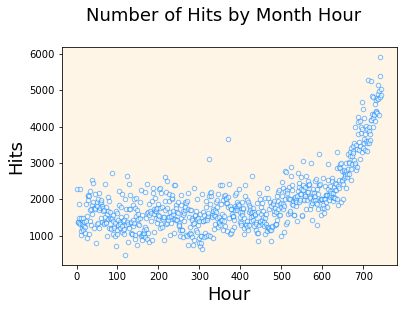

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#fff5e6'
df.plot.scatter(x='Hour', y='Hits', color='white', s=20, alpha=.5, edgecolor='#0080ff');
plt.suptitle("Number of Hits by Month Hour\n", y=1.02, fontsize=18);
plt.xlabel('Hour', fontsize=18);
plt.ylabel('Hits', fontsize=18);

**Discussion**

The scatter plot shows a strong curvilinear relationship between `Hour` and `Hits`. Apparently, visitors tend to visit the site towards the end of the month, But the quick rate of change towards the end of the month may also suggest the nature of popularity trends on the web with some sites or posts going "viral" after a certain influencer or group of them with far reaches share the content. 

For prediction, simple linear regression will be performed first using the least squares method, but will likely need an exponential model fit.

#### Simple Linear Regression Analysis

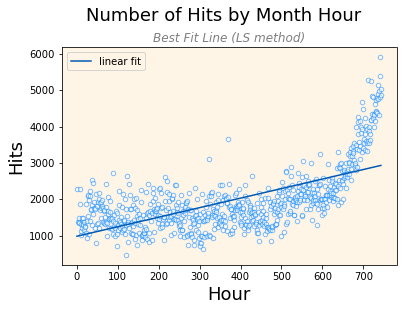

In [3]:
# sums of each x and y value
sumX = df['Hour'].sum()
sumY = df['Hits'].sum()

# sums of the products of each x,y pair
sumXY = sum(df['Hour'] * df['Hits'])

# sums of the squares of every x and y value
sumXsq = sum(df['Hour'] ** 2)
sumYsq = sum(df['Hits'] ** 2)

# slope calculation
n = len(df)
slope = ((n * sumXY) - (sumX * sumY)) / ((n * sumXsq) - (sumX)**2)

# intercept calculation
intercept = ((sumY) - (slope * sumX)) / n

# predict `hits` at noon on 5th day of next month
pred = n + (24 * 4.5)
value = slope * pred + intercept

# regression equation
Y = intercept + slope * df['Hour']

# plot equation line
plt.rcParams['axes.facecolor'] = '#fff5e6'
df.plot.scatter(x='Hour', y='Hits', color='white', s=20, alpha=.5, edgecolor='#0080ff');
plt.plot(Y, color="#0059b3", linewidth=1.5, label="linear fit");
plt.suptitle("Number of Hits by Month Hour\n", y=1.02, fontsize=18);
plt.title("Best Fit Line (LS method)", color='grey', style='italic');
plt.xlabel('Hour', fontsize=18);
plt.ylabel('Hits', fontsize=18);
plt.legend();

**Discussion**
As expected, the trendline from the linear model does not adequately capture visitor behavior. An exponential fit would be more appropriate as the data exhibits a slow rate of change then a much faster rate.

The predicted value of the next month's fifth hour would be: **3194** hits.

### Exponential Fit
As a comparison, an exponential fit was attempted using the `scipy.optimize.curve_fit` function for simpler computation. Initial parameters of '0' for `a`, `b` and -infinity to intinity bounds were used. The `exponential()` function and subsequent fitting procedure was based on the `scipy` documentation and [Towards Data Science](https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509). 

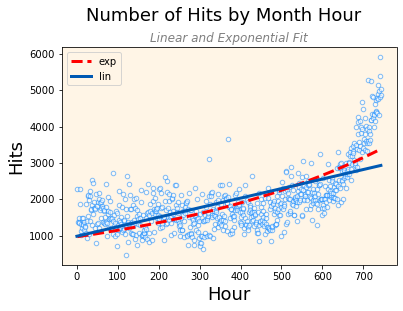

In [4]:
from scipy.optimize import curve_fit

# calculate exponential with constants a, b
def exponential(x, a, b):
    return a*np.exp(b*x)

# fit exp equation
pars, cov = curve_fit(f=exponential, xdata=df['Hour'], ydata=df["Hits"], p0=[0, 0], bounds=(-np.inf, np.inf))

# Get std of pars
stdevs = np.sqrt(np.diag(cov))

# calc residuals
res = df['Hits'] - exponential(df['Hour'], *pars)

# predict `hits` at noon on 5th day of next month
pred = n + (24 * 4.5)
value = exponential(pred, *pars)

plt.rcParams['axes.facecolor'] = '#fff5e6'
df.plot.scatter(x='Hour', y='Hits', color='white', s=20, alpha=.5, edgecolor='#0080ff');
plt.suptitle("Number of Hits by Month Hour\n", y=1.02, fontsize=18);
plt.title("Linear and Exponential Fit", color='grey', style='italic');
plt.xlabel('Hour', fontsize=18);
plt.ylabel('Hits', fontsize=18);
plt.plot(df['Hour'], exponential(df['Hour'], *pars), linestyle='--', linewidth=3, color='Red', label='exp');
plt.plot(Y, color="#0059b3", linewidth=3, label='lin');
plt.legend();

### Concluding Discussion
The exponential fit seems to be a little more accurate, but still needs some fine tuning. The difference between predictions of the linear and exponential fits are about 800 hits.

The predicted value of the next month's fifth hour would be: **4007 hits**.